In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:

df = pd.read_csv("car data.csv")


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:

df['Car_Age'] = 2025 - df['Year']
df = df.drop(['Year'], axis=1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

df = df.drop_duplicates()

In [ ]:

df = df.fillna(method='ffill')

<ipython-input-16-0a95e2700ef8>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:

categorical_cols = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
numerical_cols = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']

In [ ]:

from sklearn.impute import SimpleImputer
numerical_transformer = SimpleImputer(strategy='mean')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


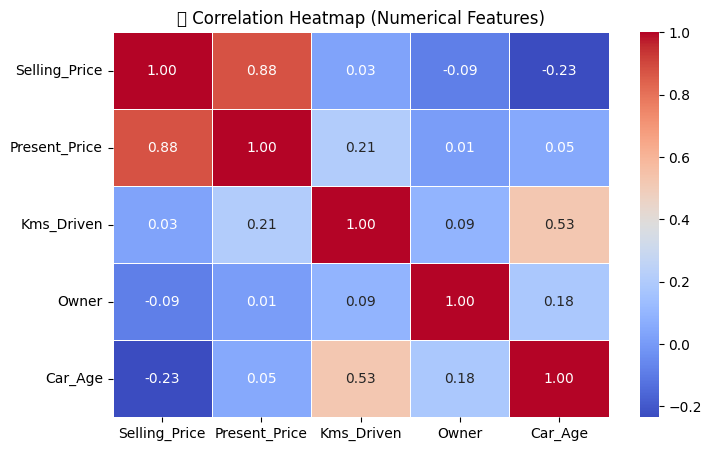

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("📊 Correlation Heatmap (Numerical Features)")
plt.show()


<ipython-input-39-f87531e80517>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


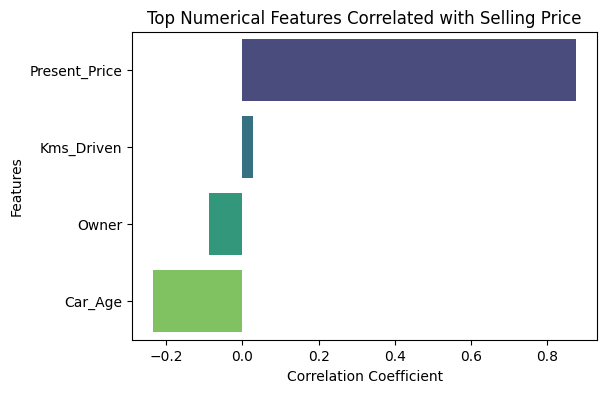

In [ ]:

top_corr = corr_matrix['Selling_Price'].drop('Selling_Price').sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top Numerical Features Correlated with Selling Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


<ipython-input-41-219d3101ceea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='Set2')


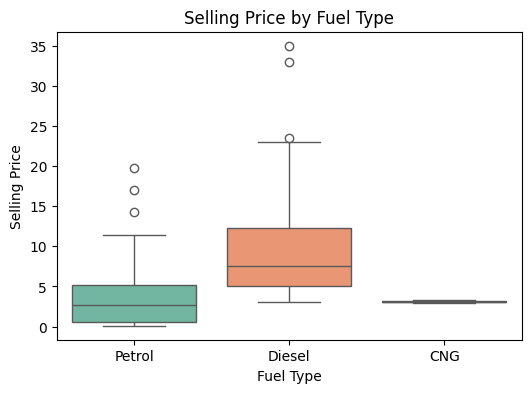

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='Set2')
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()


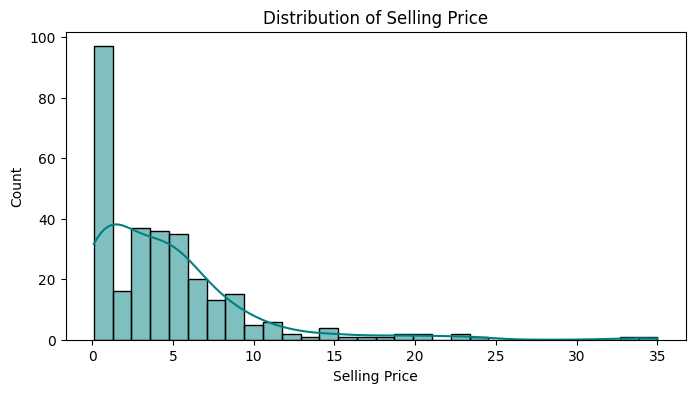

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Selling_Price'], kde=True, bins=30, color='teal')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()


In [ ]:

X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
from sklearn.metrics import mean_absolute_error
import joblib


In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=40)


In [ ]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


In [ ]:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Present_Price',
                                                   'Kms_Driven', 'Owner',
                                                   'Car_Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Seller_Type',
                                                   'Transmission'])])),
                ('model', RandomForestRegressor(random_state=40))])

In [ ]:

preds = pipeline.predict(X_valid)


In [ ]:

mae = mean_absolute_error(y_valid, preds)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.53


In [ ]:
preds

array([ 6.8219,  0.19  ,  7.1314,  3.908 ,  2.975 ,  0.6214,  5.5008,
        4.35  , 16.4774,  1.077 ,  4.3825,  7.7651,  0.2188,  3.033 ,
        2.1385,  4.439 ,  3.2778,  8.1817,  3.6035,  8.5005,  0.1889,
        1.1479,  0.7458,  0.5472,  4.945 ,  1.1205,  0.1796,  4.5805,
        8.8966,  5.481 ,  6.5998,  9.1005,  7.3039,  1.097 ,  4.7528,
        0.5114,  0.3653,  0.2568,  5.363 ,  8.0681,  7.3575,  5.1377,
       20.2322,  3.332 ,  4.536 ,  0.5815,  3.079 ,  4.2115,  6.2575,
        2.5625,  6.486 ,  3.8325,  0.3314,  1.1741,  7.8266, 11.4309,
        0.5594,  5.264 ,  6.441 ,  0.4358])

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_valid, preds)
print(f'R² Score: {r2:.2f}')


R² Score: 0.96


In [ ]:

joblib.dump(pipeline, 'car_price_model_with_name.pkl')


['car_price_model_with_name.pkl']